### Итоговая работа.

In [123]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym
from sklearn.metrics import pairwise_distances
from scipy.optimize import differential_evolution

from sklearn import preprocessing
from sklearn.decomposition import PCA
#from sklearn.metrics import mean_squared_error
#from sklearn.preprocessing import LabelEncoder

from scipy.optimize import minimize
%matplotlib inline
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 18,8

#### Задание 1    
Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

a) Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

b) Предположим, вы захотели сжать признаковые описания пользователя с 15 фильмов, до, скажем, 5-ти признаков, как вы это сделаете?


In [86]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])


In [87]:
# а) Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из
# (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

cosine = pairwise_distances(raitings, metric = 'cosine')
print('Наиболее похожие пользователи со следующими индексами:')
for i in range(10):
    cosine[i][i] = 1 # Заменила 0 на 1, чтобы в выборе не участвовало сравнение векторов по пользователям с самим собой
    print(f'{i} - {list(cosine[i]).index(min(cosine[i]))}')



Наиболее похожие пользователи со следующими индексами:
0 - 8
1 - 4
2 - 9
3 - 9
4 - 8
5 - 9
6 - 3
7 - 5
8 - 0
9 - 2


In [88]:
# b) Предположим, вы захотели сжать признаковые описания пользователя с 15 фильмов, до, скажем, 5-ти признаков, как вы это сделаете?
# Нормализуем параметры
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
raitings_scaled = min_max_scaler.fit_transform(raitings)

# Создаем модель PCA. Уменьшаем количество атрибутов таблицы, проецируя все атрибуты в новое пространство,
# составленное методом минимальных компонент (всего выбрано 5 самых важных векторов для пространства)

pca = PCA(n_components=5)

principalComponents = pca.fit_transform(raitings_scaled)
print('Полученая матрица признакового описания пользователей, сжатая с 15 до 5 признаков:')
print(principalComponents)


Полученая матрица признакового описания пользователей, сжатая с 15 до 5 признаков:
[[-1.68282013  0.14416408 -0.25664454 -1.24813581 -1.2871577 ]
 [ 0.36277868  0.94183309 -0.70353953  1.5671343  -0.13416978]
 [-0.99857666 -1.30055815 -1.2309088   0.75628374 -0.40901884]
 [ 1.38359053 -1.56080512 -0.90080673 -0.37071969 -0.09210261]
 [-0.20323238  2.1161935   0.04197632  0.80817639 -0.40544206]
 [ 0.212618   -0.95459161  2.35990947  0.79804184 -0.03850812]
 [ 2.56028278  0.86600609 -0.42014235 -0.83985131  1.09797078]
 [ 1.66804774 -0.37048693  0.68046557 -0.50970222 -0.96239766]
 [-1.65640639  0.96699697  0.46115045 -1.16585039  0.57467609]
 [-1.64628218 -0.84875193 -0.03145988  0.20462314  1.65614989]]


#### Задание 2
Вычислите производную $tg^2(sin(x) + cos(2x+3))$ в точке $x_0=1$ (на python и на бумаге).

In [89]:
def f(x): # Создала функцию
    return (sym.tan(sym.sin(x)+sym.cos(2*x+3)))**2
def f1(x): # Создала функцию первой производной
    return sym.diff(f(x))
x = sym.Symbol('x') # обозначила переменную х
print('Значение первой производной при х=1: ', f(x), ' = ', f1(x).evalf(subs = {x: 1}))

Значение первой производной при х=1:  tan(sin(x) + cos(2*x + 3))**2  =  55.3859176353379


#### Задание 3
Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x. Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку error.

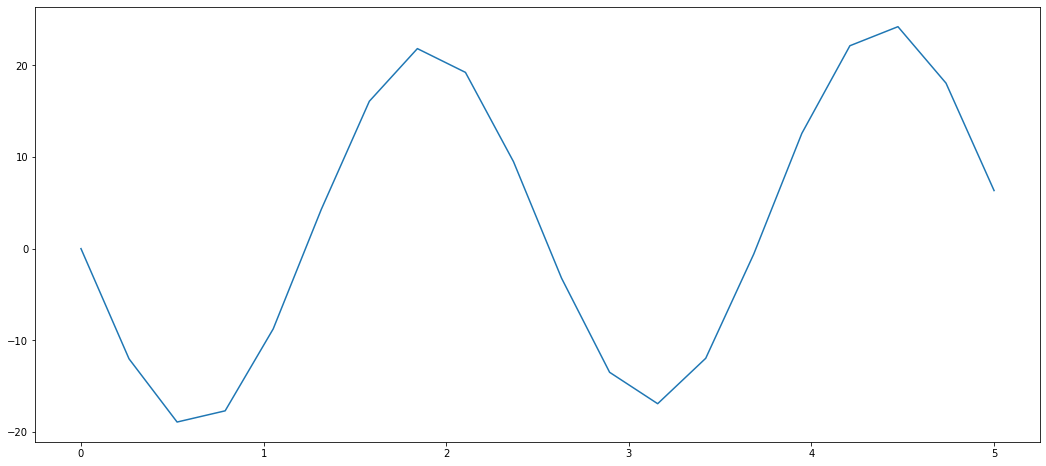

Оптимальные параметры a и b, минимизирующие ошибкуб выраженную функцией error - [ 3.  -2.5] соответственно


In [148]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])
fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])
plt.plot(x, fx)
plt.show()

def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))
bounds = [(-5, 5), (-5, 5)]

result = differential_evolution(error, bounds)
result
print(f'Оптимальные параметры a и b, минимизирующие ошибкуб выраженную функцией error - {result.x} соответственно')

#### Задание 4
Создайте собственную дискретную случайную величину с 20 значениями. Сгенерируйте 1000 выборок размера 50. Посчитайте среднее для каждой выборки. Постройте гистограмму распределения средних.

In [91]:
x = [np.random.randint(1,50) for _ in range(20)] # создала дискретную величину cо значениями до 20
a = np.array([]) # задала массив для сохранения средних
x

[37, 39, 30, 28, 24, 11, 10, 35, 4, 45, 8, 5, 34, 24, 9, 14, 19, 48, 15, 42]

In [105]:
for i in range(1000):
    a = np.append(a, np.random.choice(x1, size = 50, replace = True).mean())
print(f'Значение средней по 1000 выборкам: {a}')

Значение средней по 1000 выборкам: [26.6  24.56 26.46 ... 23.8  27.   28.3 ]


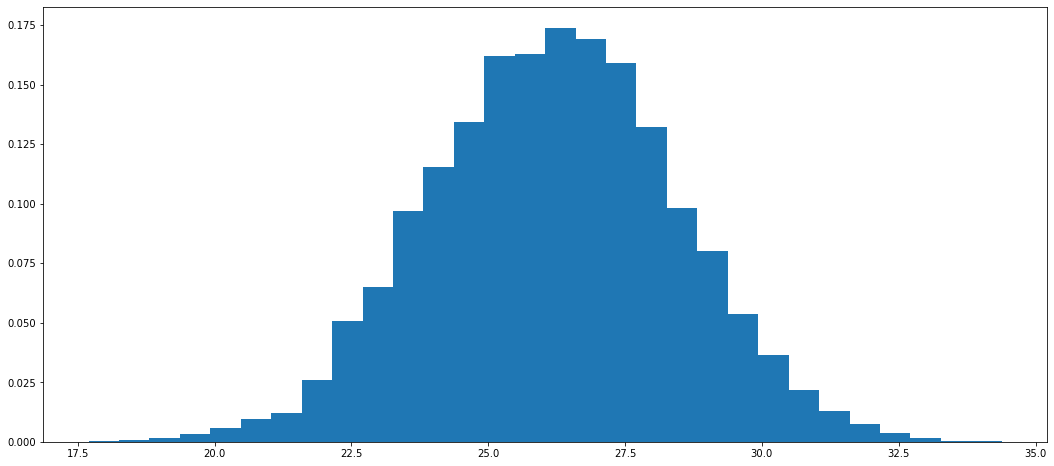

In [106]:
plt.hist(a, density=True, bins=30) # Гистограмма распределения средних
plt.show()

#### Задание 5
Найдите собственные значения и собственные вектора матрицы (на python и на бумаге)

In [158]:
M = np.array([[1, 4], [1, 1]])
print(M)

[[1 4]
 [1 1]]


In [160]:
u, v = np.linalg.eig(M)

for i in range(len(u)):
    print('Собственное значение матрицы m - ', u[i])
    print('Соответствующий ему Собственный вектора матрицы m - ', v[i])

Собственное значение матрицы m -  3.0000000000000004
Соответствующий ему Собственный вектора матрицы m -  [ 0.89442719 -0.89442719]
Собственное значение матрицы m -  -0.9999999999999996
Соответствующий ему Собственный вектора матрицы m -  [0.4472136 0.4472136]
